In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import IPython.display as ipd
import librosa, librosa.display
import sklearn.preprocessing
import numpy as np
from scipy.io.wavfile import write
#from pydub import AudioSegment
import math
import os
import argparse
from pathlib import Path

1.004765


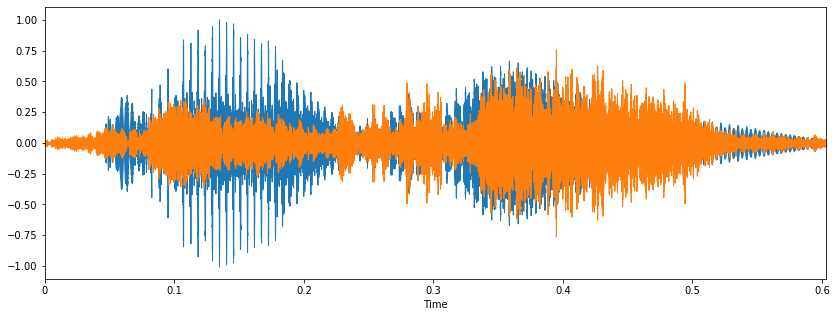

In [2]:
def trim_audio(x):
    #print(x)
    middle = np.where(x == max(x[int(len(x)*0.1):int(len(x)*0.95)]))[0][0]
    #print(max(abs(x[int(len(x)*0.1):int(len(x)*0.9)])))
    #print(middle, x[middle])
    minI, maxI = middle, middle
    while max(abs(x[minI:minI+500])) > 0.1:
        minI -= 50
    #print(minI)
    while max(abs(x[maxI-500:maxI])) > 0.1:
        maxI += 50
    #print(maxI)
    #print(x[minI:maxI+500])
    return x[minI-500:maxI+1000] if minI > 500 else x[minI:maxI+1000]

x, sr = librosa.load("UASpeech/audio/M16/M16_B1_CW3_M4.wav")
x = trim_audio(x)
#print(x)
print(max(abs(x)))
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)
ipd.Audio(x, rate=sr)
x, sr = librosa.load("UASpeech/audio/M16/M16_B3_CW100_M3.wav")
x = trim_audio(x)
librosa.display.waveplot(x, sr=sr)

In [3]:
def process_audio(fn):
    #word, num = split_filename(fn)
    #fn = check_file(fn)
    path = Path(fn)
    #print(fn)
    if fn == None:
        print("Not valid File")
    
    # checks to see if file already exists
    '''if Path("/".join(path.parts[:-1])+"/.Processed/p"+path.name).is_file():
        file = "/".join(path.parts[:-1])+"/.Processed/p"+path.name
        time = librosa.get_duration(filename=file)
        return librosa.load(file, sr = int(4410/time))'''
        
    x, sr = librosa.load(fn)
    #trim audio
    #print("original: "+ str(x))
    x = trim_audio(x)
    #print("trimmed: " + str(x))
    
    #convert to audio file
    strdir = "/".join(path.parts[:-1])+"/.Processed/"
    try:
        #print(strdir)
        os.mkdir(strdir)
    except:
        pass
        
    newFilename = strdir + 'p' + path.name
    scaled = np.int16(x/np.max(np.abs(x)) * 32767)
    write(newFilename, 44100, scaled)
    time = librosa.get_duration(filename=newFilename)
    x, sr = librosa.load(newFilename, sr = int(4410/time))
    return x, sr

process_audio("UASpeech/audio/M16/M16_B1_C1_M4.wav")
#print(os.listdir("UASpeech/audio/M16/"))

(array([ 0.00080971,  0.00267058, -0.00618105, ..., -0.00716702,
         0.02209109,  0.        ], dtype=float32),
 10656)

In [4]:
def get_np_difs(np1, np2):
    dif_df = np.square(np1 - np2)
    #print(dif_df)
    row_dif = np.sqrt(np.sum(dif_df, axis = 1))
    #print("row_dif\n")
    #print(row_dif)
    row_dif = np.sum(row_dif)
    #print(row_dif)
    
    col_dif = np.sqrt(np.sum(dif_df, axis = 0))
    #print("col_dif\n")
    #print(col_dif)
    col_dif = np.sum(col_dif)
    #print(col_dif)
    return row_dif, col_dif


In [5]:
def get_zero_crossing_dif(x1, x2):
    zero_crossings1 = librosa.zero_crossings(x1, pad=False)
    zero_crossings2 = librosa.zero_crossings(x2, pad=False)
    return sum(zero_crossings1) - sum(zero_crossings2)

In [6]:
def lasso_regression(row_dif, col_dif, num_zero_crossings):
    return row_dif**2 + col_dif**2 + num_zero_crossings**2

len = 0.2
0.14739304812834225


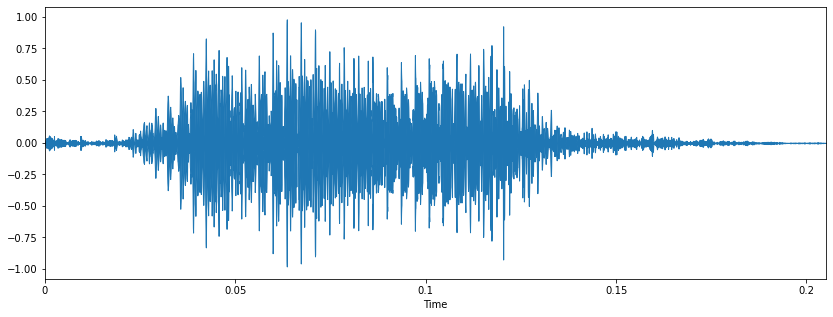

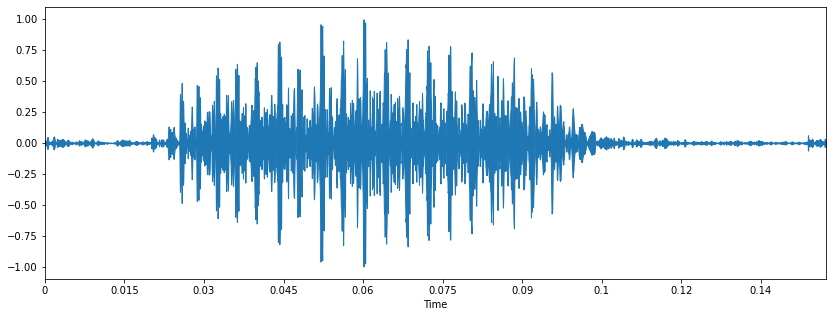

In [641]:
x, sr = process_audio("UASpeech/audio/M16/M16_B2_CW1_M4.wav")
#x, sr = librosa.load("UASpeech/audio/M16/M16_B2_UW65_M4.wav")
print("len =", round(len(x)/sr, 1) )
#x1 = trim_audio(x)
#print("trimmed len =", len(x1))
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x[:], sr=sr)
x, sr = process_audio("UASpeech/audio/M16/M16_B1_CW51_M4.wav")
print(len(x)/sr)
#x, sr = process_audio("UASpeech/audio/M16/M16_B2_CW2_M7.wav")

plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

In [7]:
import csv

x = 0
with open('UASpeech/speaker_wordlist.csv', mode='r') as infile:
    reader = csv.reader(infile)
    word_dict = {rows[1]:rows[0] for rows in reader}
del word_dict['FILE NAME']
print(word_dict.keys())

dict_keys(['D3', 'D9', 'D0', 'D6', 'D7', 'D8', 'D4', 'D5', 'D1', 'D2', 'LE', 'LD', 'LW', 'LK', 'LS', 'LT', 'LU', 'LX', 'LJ', 'LC', 'LQ', 'LP', 'LZ', 'LR', 'LF', 'LI', 'LL', 'LV', 'LY', 'LG', 'LH', 'LN', 'LB', 'LO', 'LA', 'LM', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'CW1', 'CW2', 'CW3', 'CW4', 'CW5', 'CW6', 'CW7', 'CW8', 'CW9', 'CW10', 'CW11', 'CW12', 'CW13', 'CW14', 'CW15', 'CW16', 'CW17', 'CW18', 'CW19', 'CW20', 'CW21', 'CW22', 'CW23', 'CW24', 'CW25', 'CW26', 'CW27', 'CW28', 'CW29', 'CW30', 'CW31', 'CW32', 'CW33', 'CW34', 'CW35', 'CW36', 'CW37', 'CW38', 'CW39', 'CW40', 'CW41', 'CW42', 'CW43', 'CW44', 'CW45', 'CW46', 'CW47', 'CW48', 'CW49', 'CW50', 'CW51', 'CW52', 'CW53', 'CW54', 'CW55', 'CW56', 'CW57', 'CW58', 'CW59', 'CW60', 'CW61', 'CW62', 'CW63', 'CW64', 'CW65', 'CW66', 'CW67', 'CW68', 'CW69', 'CW70', 'CW71', 'CW72', 'CW73', 'CW74', 'CW75', 'CW76', 'CW77', 'CW78', 'CW79', 'CW80', 'CW81', 'CW82', 'C

In [8]:
def get_word_from_filename(fn):
    path = Path(fn)
    fn = path.name.split('_')
    #print(len(fn))
    #print(path, fn, len(fn), fn[2])
    return word_dict[fn[1]+"_"+fn[2]] if "UW" in fn[2] else word_dict[fn[2]]
print("no" in "yes")
get_word_from_filename("UASpeech/audio/M16/M16_B3_CW75_M4.wav")

False


'no'

In [17]:
def compare(person, word, first_word_filename, min_difs, min_file, second_min_difs, second_min_file, x1, sr1, mfccs1):
    for i in range(1,4):
        filename = "UASpeech/audio/"+person+"/"+person+"_B"+str(i)+"_"+word+"_M4.wav"
        if filename == first_word_filename:
            continue
        #print(filename)
        x2, sr = process_audio(filename)
        mfccs2 = librosa.feature.mfcc(x2, sr=sr)
        #print(mfccs2.shape)
        if mfccs2.shape != mfccs1.shape:
            continue
        difs = get_np_difs(mfccs1, mfccs2)
        lasso_dif = lasso_regression(difs[0], difs[1], get_zero_crossing_dif(x1, x2))
        if min_difs == None or min_difs > lasso_dif:
            min_difs = lasso_dif
            min_file = filename
        elif second_min_difs == None or second_min_difs > lasso_dif:
            second_min_difs = lasso_dif
            second_min_file = filename
        
    return min_difs, min_file, second_min_difs, second_min_file

In [15]:
wordnum = 1
guesses = []
word = ""
for wordnum in range(1,4):
    first_word_filename = "UASpeech/audio/M16/M16_B"+str(wordnum)+"_CW100_M3.wav"
    word = get_word_from_filename(first_word_filename)
    min_difs = None
    min_file = ""
    second_min_difs = None
    second_min_file = ""
    x1, sr1 = process_audio(first_word_filename)
    mfccs1 = librosa.feature.mfcc(x1, sr=sr)
    for i in range(1, 101):
        min_difs, min_file, second_min_difs, second_min_file = compare("M16", "CW"+str(i), first_word_filename, min_difs, min_file, second_min_difs, second_min_file, x1, sr1, mfccs1)
    #for i in range(1,20):
    #min_difs, min_file, second_min_difs, second_min_file = compare("M16", "C"+str(i), first_word_filename, min_difs, min_file, second_min_difs, second_min_file, x1, mfccs1)
    #print(min_file)
    guesses.append(get_word_from_filename(min_file))
    #print("expected: "+get_word_from_filename(first_word_filename)+"\t recieved: ", end="")
    #print(get_word_from_filename(min_file),str(second_min_difs-min_difs),get_word_from_filename(second_min_file))
print("expected: "+word+"\t recieved: ", end="")
print(guesses[0]+"\t"+guesses[1]+"\t"+guesses[2]+"\t\taccuracy: "+str(round(guesses.count(word)*100/3, 2)) + "%")

expected: yes	 recieved: yes	yes	yes		accuracy: 100.0%


In [18]:
#%%timeit
def get_accuracy_of_person(person):
    total_accuracy = 0
    for w in range(1, 101):
        guesses = []
        word = ""
        for wordnum in range(1,4):
            first_word_filename = "UASpeech/audio/"+person+"/"+person+"_B"+str(wordnum)+"_CW"+str(w)+"_M3.wav"
            word = get_word_from_filename(first_word_filename)
            min_difs = None
            min_file = ""
            second_min_difs = None
            second_min_file = ""
            x1, sr1 = process_audio(first_word_filename)
            mfccs1 = librosa.feature.mfcc(x1, sr=sr)
            for i in range(1, 101):
                min_difs, min_file, second_min_difs, second_min_file = compare(person, "CW"+str(i), first_word_filename, min_difs, min_file, second_min_difs, second_min_file, x1, sr1, mfccs1)
            #for i in range(1,20):
            #min_difs, min_file, second_min_difs, second_min_file = compare("M16", "C"+str(i), first_word_filename, min_difs, min_file, second_min_difs, second_min_file, x1, mfccs1)
            #print(min_file)
            guesses.append(get_word_from_filename(min_file))
            #print("expected: "+get_word_from_filename(first_word_filename)+"\t recieved: ", end="")
            #print(get_word_from_filename(min_file),str(second_min_difs-min_difs),get_word_from_filename(second_min_file))
        print("expected: "+word+"\t recieved: ", end="")
        print(guesses[0]+"\t"+guesses[1]+"\t"+guesses[2]+"\t\taccuracy: "+str(round(guesses.count(word)*100/3, 2)) + "%")
        #print(w, end="\t")
        total_accuracy += round(guesses.count(word)*100/3, 2)
    print("total_accuracy =", round(total_accuracy/100, 2))
get_accuracy_of_person("M16")

expected: the	 recieved: the	from	the		accuracy: 66.67%
expected: of	 recieved: of	on	them		accuracy: 33.33%
expected: and	 recieved: and	and	and		accuracy: 100.0%
expected: a	 recieved: a	from	a		accuracy: 66.67%
expected: to	 recieved: to	to	to		accuracy: 100.0%
expected: in	 recieved: in	in	in		accuracy: 100.0%


KeyboardInterrupt: 

In [ ]:
yesx, sr = librosa.load('Yes1.m4a')
mfccsyes = librosa.feature.mfcc(yesx, sr=sr)

nox, sr = librosa.load('No1.m4a')
mfccsno = librosa.feature.mfcc(nox, sr=sr)

testx, sr = librosa.load('No2.m4a')
mfccstest = librosa.feature.mfcc(testx, sr=sr) 
print(np.linalg.norm(mfccsno-mfccstest))

In [ ]:
import os
import shutil

In [391]:
'''path = "F"
dirs = os.listdir(path)
for d in dirs: # person
    print(d,end = "\n____\n")
    try:
        os.makedir("Extra")
    except:
        pass
    if os.path.isdir(os.path.join(path, d)):
        for d_1 in os.listdir(path +"/"+ d): # session level
            if os.path.isfile(os.path.join(path +"/"+ d, d_1)):
                continue
            print(d_1, end="\n\n")
            for d_2 in os.listdir(path +"/"+ d +"/"+ d_1): # files
                print(d_2)
                try:
                    if d_2=="wav_arrayMic" or d_2=="prompts" or d_2=="wav_headMic":
                        shutil.move(path +"/"+ d +"/"+ d_1 +"/"+ d_2, path +"/"+ d)
                    else:
                        shutil.move(path +"/"+ d +"/"+ d_1 +"/"+ d_2, path +"/"+ d +"/"+ "Extra")
                except Exception as exc:
                    print(exc)'''
print(np.arange(24).reshape(4,1,3,2)*np.arange(1).reshape(1,1,1))
np.power(np.arange(100), 2)

[[[[0 0]
   [0 0]
   [0 0]]]


 [[[0 0]
   [0 0]
   [0 0]]]


 [[[0 0]
   [0 0]
   [0 0]]]


 [[[0 0]
   [0 0]
   [0 0]]]]


array([   0,    1,    4,    9,   16,   25,   36,   49,   64,   81,  100,
        121,  144,  169,  196,  225,  256,  289,  324,  361,  400,  441,
        484,  529,  576,  625,  676,  729,  784,  841,  900,  961, 1024,
       1089, 1156, 1225, 1296, 1369, 1444, 1521, 1600, 1681, 1764, 1849,
       1936, 2025, 2116, 2209, 2304, 2401, 2500, 2601, 2704, 2809, 2916,
       3025, 3136, 3249, 3364, 3481, 3600, 3721, 3844, 3969, 4096, 4225,
       4356, 4489, 4624, 4761, 4900, 5041, 5184, 5329, 5476, 5625, 5776,
       5929, 6084, 6241, 6400, 6561, 6724, 6889, 7056, 7225, 7396, 7569,
       7744, 7921, 8100, 8281, 8464, 8649, 8836, 9025, 9216, 9409, 9604,
       9801])